In [227]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [228]:
data = pd.read_csv('monster_com-job_sample.csv')
data.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


In [230]:
data.describe()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
count,22000,22000,122,22000,22000,22000,22000,20372,22000,15133,22000,3446,16806,22000
unique,1,1,78,1,1,18744,18759,39,8423,738,22000,1737,163,22000
top,United States of America,US,9/22/2016,No,jobs.monster.com,12N Horizontal Construction Engineers Job Desc...,Monster,Full Time,"Dallas, TX",Healthcare Services,http://jobview.monster.com/it-support-technici...,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),11d599f229a80023d2f40e7c52cd941e
freq,22000,22000,6,22000,22000,104,318,6757,646,1919,1,50,4594,1


## Clear unnecessary data

In [231]:
data.drop(columns=['page_url' , 'location' , 'job_description' ,'job_title' ,'date_added','country_code' , 'uniq_id'] , inplace=True)


In [232]:
data.head()

,country,has_expired,job_board,job_type,organization,salary,sector
0,United States of America,No,jobs.monster.com,Full Time Employee,NaN,NaN,IT/Software Development
1,United States of America,No,jobs.monster.com,Full Time,Printing and Publishing,NaN,NaN
2,United States of America,No,jobs.monster.com,"Full Time, Employee",Personal and Household Services,NaN,NaN
3,United States of America,No,jobs.monster.com,Full Time,Altec Industries,NaN,Experienced (Non-Manager)
4,United States of America,No,jobs.monster.com,Full Time Employee,Retail,NaN,Project/Program Management


In [233]:
data.drop(columns=['has_expired' , 'job_board'] , inplace=True)

In [234]:
data.head()

,country,job_type,organization,salary,sector
0,United States of America,Full Time Employee,NaN,NaN,IT/Software Development
1,United States of America,Full Time,Printing and Publishing,NaN,NaN
2,United States of America,"Full Time, Employee",Personal and Household Services,NaN,NaN
3,United States of America,Full Time,Altec Industries,NaN,Experienced (Non-Manager)
4,United States of America,Full Time Employee,Retail,NaN,Project/Program Management


## handling categorical data

In [235]:
data.shape

(22000, 5)

In [236]:
len(data['country'].unique())

1

In [237]:
data.drop(columns=['country'] , inplace = True)

In [238]:
data.head()

,job_type,organization,salary,sector
0,Full Time Employee,NaN,NaN,IT/Software Development
1,Full Time,Printing and Publishing,NaN,NaN
2,"Full Time, Employee",Personal and Household Services,NaN,NaN
3,Full Time,Altec Industries,NaN,Experienced (Non-Manager)
4,Full Time Employee,Retail,NaN,Project/Program Management


In [239]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder


In [240]:
encoder = OrdinalEncoder()
cols = ['job_type' , 'organization' , 'sector']
data[cols] = encoder.fit_transform(data[cols])

data

,job_type,organization,salary,sector
0,8.0,NaN,NaN,102.0
1,2.0,538.0,NaN,NaN
2,11.0,531.0,NaN,NaN
3,2.0,101.0,NaN,56.0
4,8.0,580.0,NaN,137.0
...,...,...,...,...
21995,2.0,NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN
21996,2.0,264.0,"45,000.00 - 60,000.00 $ /year",111.0
21997,2.0,NaN,NaN,NaN
21998,8.0,419.0,25.00 - 28.00 $ /hour,103.0


## clean salary and transform to numerical data

In [241]:
import re

In [242]:
def clean(text):
    if pd.isna(text):
        return np.nan
    
    text=text.lower()

    hourely= '/houre'in text
    yearly = '/year' in text or '/per year' in text

    nums = re.findall(r'\d{1,3}(?:,\d{3})*(?:\.\d+)?', text)
    if not nums :
        return np.nan

    nums = [float(n.replace(',' , '')) for n in nums]
    avg_salary = np.mean(nums)

    if hourely :
        avg_salary *= 2080
    
    return avg_salary

In [243]:
data['clean_salary'] = data['salary'].apply(clean)

In [244]:
data

,job_type,organization,salary,sector,clean_salary
0,8.0,NaN,NaN,102.0,NaN
1,2.0,538.0,NaN,NaN,NaN
2,11.0,531.0,NaN,NaN,NaN
3,2.0,101.0,NaN,56.0,NaN
4,8.0,580.0,NaN,137.0,NaN
...,...,...,...,...,...
21995,2.0,NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,140000.000000
21996,2.0,264.0,"45,000.00 - 60,000.00 $ /year",111.0,52500.000000
21997,2.0,NaN,NaN,NaN,NaN
21998,8.0,419.0,25.00 - 28.00 $ /hour,103.0,26.500000


In [245]:
data.drop(columns=['salary'] , inplace = True)

In [246]:
from sklearn.impute import KNNImputer

In [247]:
imputer = KNNImputer(n_neighbors=3)
data_impute = imputer.fit_transform(data)


In [248]:
data_impute[: , -1]

array([4.83570000e+04, 5.11858333e+04, 1.18333333e+05, ...,
       5.11703333e+04, 2.65000000e+01, 2.86716667e+04])

In [249]:
data[cols] = pd.DataFrame(encoder.inverse_transform(data_impute[: , :3]) , columns=cols)

In [250]:
data['clean_salary'] = data_impute[: , -1]

In [251]:
data.head()

,job_type,organization,sector,clean_salary
0,Full Time Employee,Energy and Utilities; Construction - Industria...,IT/Software Development,48357.000000
1,Full Time,Printing and Publishing,General/Other: Quality Assurance/Safety,51185.833333
2,"Full Time, Employee",Personal and Household Services,Demonstrate the highest level of leadership an...,118333.333333
3,Full Time,Altec Industries,Experienced (Non-Manager),51185.833333
4,Full Time Employee,Retail,Project/Program Management,82500.000000


In [252]:
data.head()

,job_type,organization,sector,clean_salary
0,Full Time Employee,Energy and Utilities; Construction - Industria...,IT/Software Development,48357.000000
1,Full Time,Printing and Publishing,General/Other: Quality Assurance/Safety,51185.833333
2,"Full Time, Employee",Personal and Household Services,Demonstrate the highest level of leadership an...,118333.333333
3,Full Time,Altec Industries,Experienced (Non-Manager),51185.833333
4,Full Time Employee,Retail,Project/Program Management,82500.000000


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_type      22000 non-null  object 
 1   organization  22000 non-null  object 
 2   sector        22000 non-null  object 
 3   clean_salary  22000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 687.6+ KB


In [254]:
import category_encoders as ce 

In [255]:
tar_encoder = ce.TargetEncoder()

data = tar_encoder.fit_transform(data , data['clean_salary'])
data.head()

,job_type,organization,sector,clean_salary
0,74899.333487,59244.204329,50011.545033,48357.000000
1,50355.885256,58072.568274,49557.891357,51185.833333
2,86208.288169,69346.041714,113404.842117,118333.333333
3,50355.885256,59219.342053,52991.843817,51185.833333
4,74899.333487,60352.038539,73705.817245,82500.000000


In [256]:
data.isna().sum()

job_type        0
organization    0
sector          0
clean_salary    0
dtype: int64

In [257]:
data.isnull().sum()

job_type        0
organization    0
sector          0
clean_salary    0
dtype: int64

<Axes: >

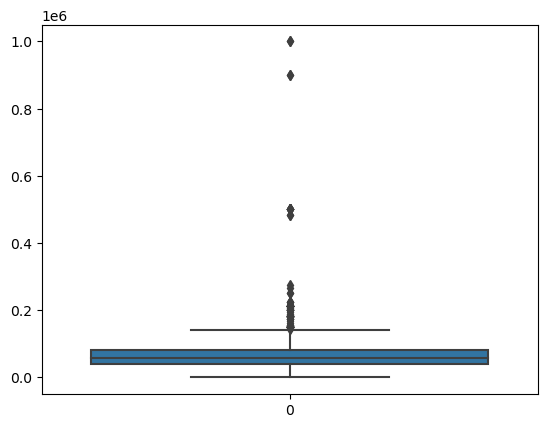

In [258]:
sns.boxplot(data['clean_salary'])

# Visualizing the distribution of clean_salary, sector, organization, and job_type using histograms


c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

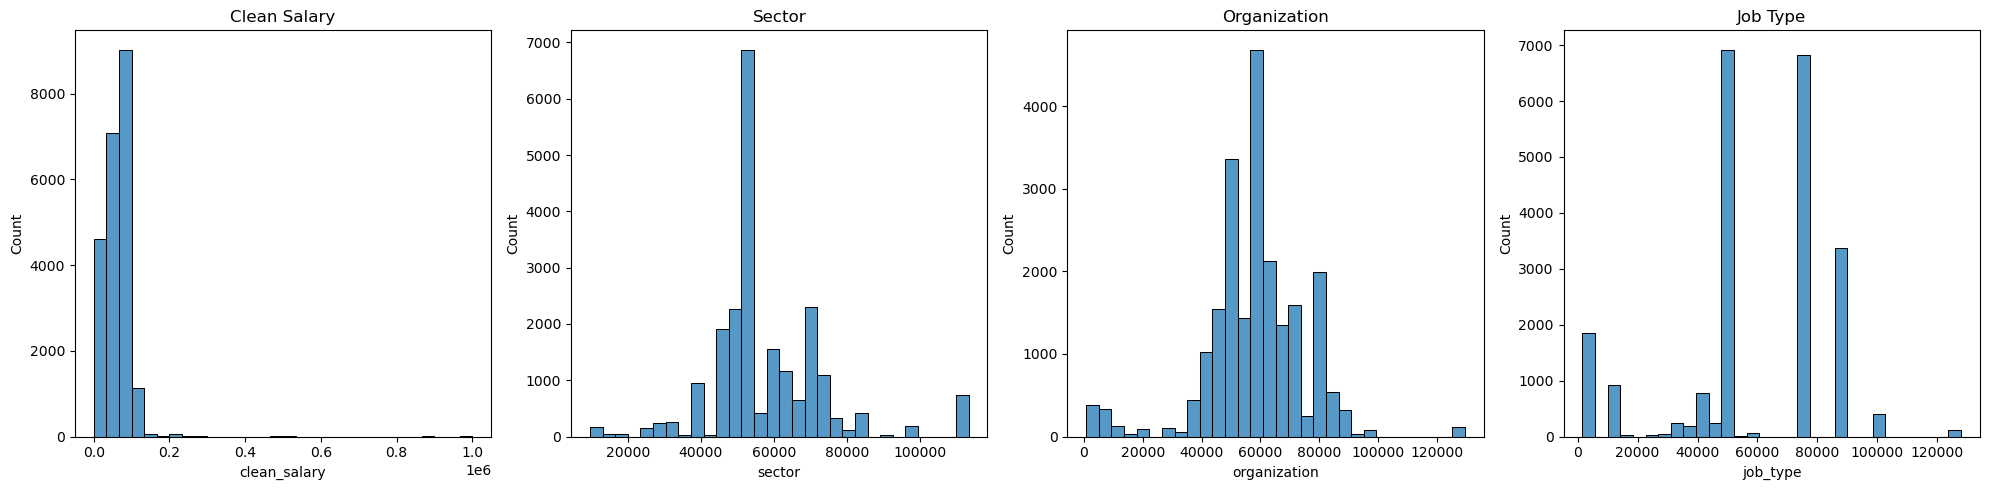

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 ردیف، 4 ستون

sns.histplot(data['clean_salary'], bins=30, ax=axes[0])
axes[0].set_title("Clean Salary")

sns.histplot(data['sector'], bins=30, ax=axes[1])
axes[1].set_title("Sector")

sns.histplot(data['organization'], bins=30, ax=axes[2])
axes[2].set_title("Organization")

sns.histplot(data['job_type'], bins=30, ax=axes[3])
axes[3].set_title("Job Type")

plt.tight_layout()
plt.show()

In [260]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer 

In [265]:
st_scaler = StandardScaler()
st_data = st_scaler.fit_transform(data)
pd.DataFrame(st_data , columns=data.columns)

,job_type,organization,sector,clean_salary
0,0.642548,0.047039,-0.500331,-0.260719
1,-0.309143,-0.021977,-0.528006,-0.185037
2,1.081061,0.642093,3.367096,1.611412
3,-0.309143,0.045574,-0.318512,-0.185037
4,0.642548,0.112296,0.945183,0.652735
...,...,...,...,...
21995,-0.309143,-0.577225,-0.789374,2.191077
21996,-0.309143,0.121198,-0.335316,-0.149878
21997,-0.309143,-0.577225,-0.445226,-0.185451
21998,0.642548,-0.465335,0.780135,-1.553742


In [270]:
mm_scaler = MinMaxScaler()
mm_data = mm_scaler.fit_transform(data)
mm_data

array([[5.80065505e-01, 4.54083462e-01, 3.89287415e-01, 4.83569952e-02],
       [3.85826310e-01, 4.44987265e-01, 3.84917047e-01, 5.11858286e-02],
       [6.69565654e-01, 5.32510801e-01, 1.00000000e+00, 1.18333329e-01],
       ...,
       [3.85826310e-01, 3.71806360e-01, 3.97989042e-01, 5.11703286e-02],
       [5.80065505e-01, 3.86553396e-01, 5.91488154e-01, 2.64950001e-05],
       [3.85826310e-01, 4.54083462e-01, 4.17998746e-01, 2.86716618e-02]])